In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
animes = pd.read_csv('./drive/MyDrive/Datasets/Anime_Recommendation/anime.csv')
ratings = pd.read_csv('./drive/MyDrive/Datasets/Anime_Recommendation/rating.csv')

In [3]:
animes.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


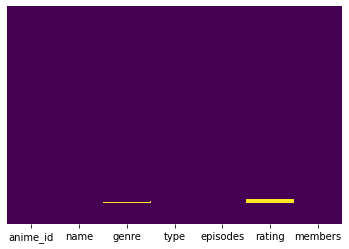

In [5]:
sns.heatmap(animes.isnull(),yticklabels=False,cbar=False,cmap='viridis')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


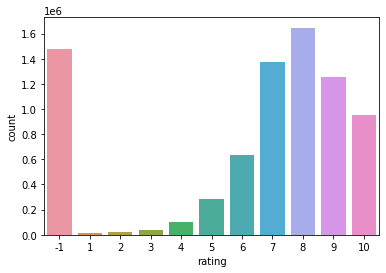

In [6]:
sns.countplot(ratings['rating'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


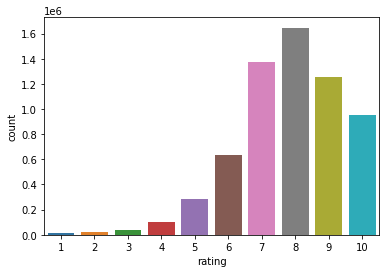

In [7]:
clean_ratings = ratings[ratings['rating']>0]
sns.countplot(clean_ratings['rating'])

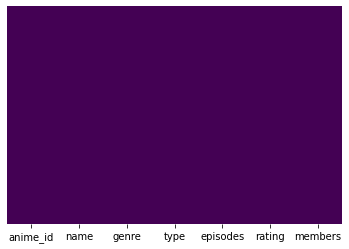

In [8]:
clean_animes = animes.dropna()
sns.heatmap(clean_animes.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
genres = clean_animes['genre'].str.split(", ", expand=True)
unique_genres = pd.Series(genres.values.ravel('K')).dropna().unique()
print(unique_genres)

['Drama' 'Action' 'Sci-Fi' 'Comedy' 'Adventure' 'Fantasy' 'Mystery'
 'Psychological' 'Ecchi' 'Josei' 'Military' 'Romance' 'Demons' 'Dementia'
 'Music' 'Game' 'Cars' 'Mecha' 'Horror' 'School' 'Historical' 'Kids'
 'Shounen' 'Shoujo' 'Magic' 'Harem' 'Martial Arts' 'Sports'
 'Slice of Life' 'Seinen' 'Parody' 'Police' 'Thriller' 'Supernatural'
 'Samurai' 'Super Power' 'Vampire' 'Space' 'Hentai' 'Yaoi' 'Shoujo Ai'
 'Shounen Ai' 'Yuri']


In [10]:
genre_dummies = pd.get_dummies(genres)
genre_dummies.head()

,0_Action,0_Adventure,0_Cars,0_Comedy,0_Dementia,0_Demons,0_Drama,0_Ecchi,0_Fantasy,0_Game,0_Harem,0_Hentai,0_Historical,0_Horror,0_Josei,0_Kids,0_Magic,0_Martial Arts,0_Mecha,0_Military,0_Music,0_Mystery,0_Parody,0_Police,0_Psychological,0_Romance,0_Samurai,0_School,0_Sci-Fi,0_Seinen,0_Shoujo,0_Shounen,0_Slice of Life,0_Space,0_Sports,0_Super Power,0_Supernatural,0_Thriller,0_Vampire,0_Yaoi,...,7_Psychological,7_Romance,7_Samurai,7_School,7_Sci-Fi,7_Seinen,7_Shoujo,7_Shounen,7_Slice of Life,7_Space,7_Sports,7_Super Power,7_Supernatural,7_Thriller,7_Vampire,7_Yuri,8_Romance,8_Samurai,8_School,8_Sci-Fi,8_Seinen,8_Shoujo,8_Shoujo Ai,8_Shounen,8_Slice of Life,8_Space,8_Sports,8_Super Power,8_Supernatural,8_Vampire,9_School,9_Sci-Fi,9_Shounen,9_Space,9_Super Power,9_Supernatural,10_Slice of Life,10_Supernatural,11_Super Power,12_Supernatural
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
for genre in unique_genres:
    clean_animes["Genre: " + genre] = genre_dummies.loc[:, genre_dummies.columns.str.endswith(genre)].sum(axis=1)
clean_animes.shape
clean_animes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017 entries, 0 to 12293
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   anime_id              12017 non-null  int64  
 1   name                  12017 non-null  object 
 2   genre                 12017 non-null  object 
 3   type                  12017 non-null  object 
 4   episodes              12017 non-null  object 
 5   rating                12017 non-null  float64
 6   members               12017 non-null  int64  
 7   Genre: Drama          12017 non-null  int64  
 8   Genre: Action         12017 non-null  int64  
 9   Genre: Sci-Fi         12017 non-null  int64  
 10  Genre: Comedy         12017 non-null  int64  
 11  Genre: Adventure      12017 non-null  int64  
 12  Genre: Fantasy        12017 non-null  int64  
 13  Genre: Mystery        12017 non-null  int64  
 14  Genre: Psychological  12017 non-null  int64  
 15  Genre: Ecchi       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
type_dummies = pd.get_dummies(clean_animes.type, prefix="Type:", prefix_sep=" ")
type_dummies.head()

,Type: Movie,Type: Music,Type: ONA,Type: OVA,Type: Special,Type: TV
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [13]:
clean_animes = pd.concat([clean_animes, type_dummies], axis=1)
clean_animes = clean_animes.drop(columns=["anime_id", "name", "type", "genre", "episodes", "rating", "members"])
clean_animes.head()

,Genre: Drama,Genre: Action,Genre: Sci-Fi,Genre: Comedy,Genre: Adventure,Genre: Fantasy,Genre: Mystery,Genre: Psychological,Genre: Ecchi,Genre: Josei,Genre: Military,Genre: Romance,Genre: Demons,Genre: Dementia,Genre: Music,Genre: Game,Genre: Cars,Genre: Mecha,Genre: Horror,Genre: School,Genre: Historical,Genre: Kids,Genre: Shounen,Genre: Shoujo,Genre: Magic,Genre: Harem,Genre: Martial Arts,Genre: Sports,Genre: Slice of Life,Genre: Seinen,Genre: Parody,Genre: Police,Genre: Thriller,Genre: Supernatural,Genre: Samurai,Genre: Super Power,Genre: Vampire,Genre: Space,Genre: Hentai,Genre: Yaoi,Genre: Shoujo Ai,Genre: Shounen Ai,Genre: Yuri,Type: Movie,Type: Music,Type: ONA,Type: OVA,Type: Special,Type: TV
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [14]:
from sklearn.neighbors import NearestNeighbors

def get_features(name):
    return clean_animes.loc[animes[animes.name == name].index]

def print_recommended(indices):
    for i in range(len(indices[0])):
        print(animes.name[animes.index == indices[0][i]])

model = NearestNeighbors()
model.fit(clean_animes.values)

NearestNeighbors()

In [16]:
input = get_features("Naruto")
index = model.kneighbors(input, 10, return_distance=False)
print_recommended(index)

615    Naruto: Shippuuden
Name: name, dtype: object
841    Naruto
Name: name, dtype: object
175    Katekyo Hitman Reborn!
Name: name, dtype: object
206    Dragon Ball Z
Name: name, dtype: object
1930    Dragon Ball Super
Name: name, dtype: object
1103    Boruto: Naruto the Movie - Naruto ga Hokage ni...
Name: name, dtype: object
1472    Naruto: Shippuuden Movie 4 - The Lost Tower
Name: name, dtype: object
3037    Starship Operators
Name: name, dtype: object
2996    Mudazumo Naki Kaikaku: The Legend of Koizumi
Name: name, dtype: object
1343    Naruto x UT
Name: name, dtype: object


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
